In [23]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit_aer import Aer
import matplotlib.pyplot as plt
import numpy as np

In [24]:
def get_state_vector(qc):
    sim = Aer.get_backend('aer_simulator')
    qc.save_statevector()

    compiled_circuit = transpile(qc, sim)
    result = sim.run(compiled_circuit).result()

    state = result.get_statevector()

    return state

state_vectors = []

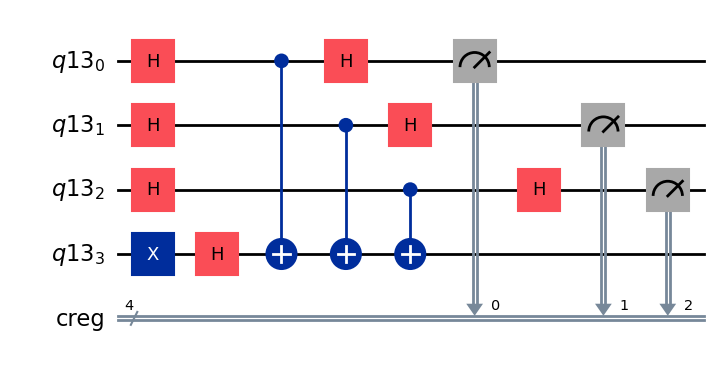

In [28]:
qreg = QuantumRegister(4)
creg = ClassicalRegister(4, "creg")
qc = QuantumCircuit(qreg, creg)

qc.x(qreg[3])
state_vectors.append(get_state_vector(qc.copy()))

qc.h(qreg[0])
state_vectors.append(get_state_vector(qc.copy()))

qc.h(qreg[1])
state_vectors.append(get_state_vector(qc.copy()))

qc.h(qreg[2])
state_vectors.append(get_state_vector(qc.copy()))

qc.h(qreg[3])
state_vectors.append(get_state_vector(qc.copy()))

qc.cx(qreg[0], qreg[3])
state_vectors.append(get_state_vector(qc.copy()))

qc.cx(qreg[1], qreg[3])
state_vectors.append(get_state_vector(qc.copy()))

qc.cx(qreg[2], qreg[3])
state_vectors.append(get_state_vector(qc.copy()))

qc.h(qreg[0])
state_vectors.append(get_state_vector(qc.copy()))

qc.h(qreg[1])
state_vectors.append(get_state_vector(qc.copy()))

qc.h(qreg[2])
state_vectors.append(get_state_vector(qc.copy()))

qc.measure(qreg[0], creg[0])
qc.measure(qreg[1], creg[1])
qc.measure(qreg[2], creg[2])

qc.draw(output='mpl')

In [29]:
print("State Vectors and Probabilities:")
for i, state_vector in enumerate(state_vectors):
    state_array = np.array(state_vector)
    num_qubits = int(np.log2(len(state_array)))

    print(f"State Vector {i + 1}:")
    for idx, amplitude in enumerate(state_array):
        binary_state = format(idx, '0' + str(num_qubits) + 'b')[::-1]
        probability = np.abs(amplitude)**2
        if probability > 1e-4:
            print(f"|{binary_state}⟩: Coefficient = {amplitude:.3f}, Probability = {probability:.3f}")
    print("\n")

State Vectors and Probabilities:
State Vector 1:
|0001⟩: Coefficient = 1.000+0.000j, Probability = 1.000


State Vector 2:
|0001⟩: Coefficient = 0.707+0.000j, Probability = 0.500
|1001⟩: Coefficient = 0.707+0.000j, Probability = 0.500


State Vector 3:
|0001⟩: Coefficient = 0.500+0.000j, Probability = 0.250
|1001⟩: Coefficient = 0.500+0.000j, Probability = 0.250
|0101⟩: Coefficient = 0.500+0.000j, Probability = 0.250
|1101⟩: Coefficient = 0.500+0.000j, Probability = 0.250


State Vector 4:
|0001⟩: Coefficient = 0.354+0.000j, Probability = 0.125
|1001⟩: Coefficient = 0.354+0.000j, Probability = 0.125
|0101⟩: Coefficient = 0.354+0.000j, Probability = 0.125
|1101⟩: Coefficient = 0.354+0.000j, Probability = 0.125
|0011⟩: Coefficient = 0.354+0.000j, Probability = 0.125
|1011⟩: Coefficient = 0.354+0.000j, Probability = 0.125
|0111⟩: Coefficient = 0.354+0.000j, Probability = 0.125
|1111⟩: Coefficient = 0.354+0.000j, Probability = 0.125


State Vector 5:
|0000⟩: Coefficient = 0.250+0.000j, Pro

<ipython-input-30-cdafeaf98f11>:1: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  probabilities = {f"⟨{format(idx, '0' + str(4) + 'b')}|": np.abs(state_vectors[-1][idx])**2 for idx in range(len(state_vectors[-1]))}


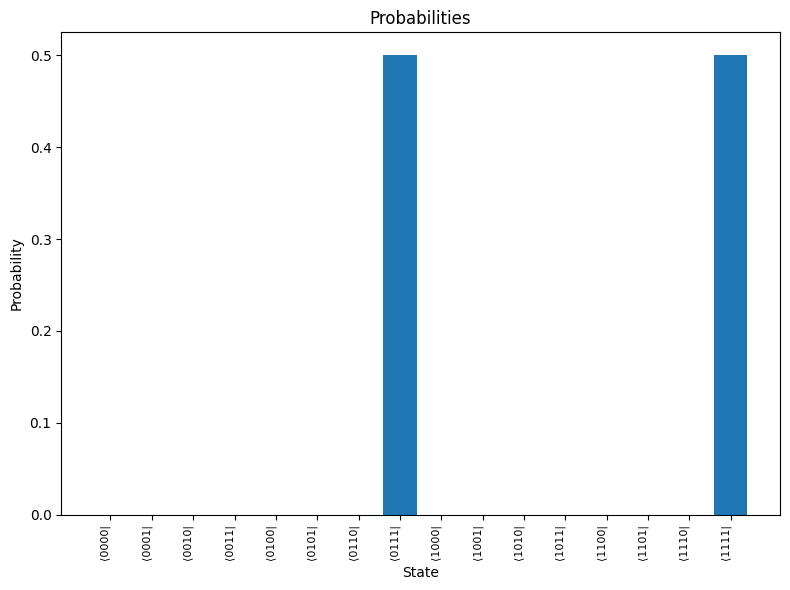

In [30]:
probabilities = {f"⟨{format(idx, '0' + str(4) + 'b')}|": np.abs(state_vectors[-1][idx])**2 for idx in range(len(state_vectors[-1]))}

plt.figure(figsize=(8, 6))
plt.bar(probabilities.keys(), probabilities.values())
plt.xlabel("State")
plt.ylabel("Probability")
plt.title("Probabilities")
plt.xticks(rotation=90, ha="right", fontsize=8)
plt.tight_layout()
plt.show()